In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕, AppleGothic 등)
plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 깨짐 방지

# STEP 1. 포천시 읍면동별 월별 시계열+공간 데이터 결합

1-1. 데이터 준비

필요 데이터:

매출현황, 인구정보, 유동인구, (카드데이터)

각 파일에서 EMD_CD(읍면동코드), 연월, feature(매출, 인구 등) 추출

1-2. 포천시 데이터만 추출


In [3]:
import pandas as pd

# 파일 경로는 실제 위치에 맞게 조정
df_retail = pd.read_csv('./데이터_전처리후/5_매출현황/지역별_도소매별_평균매출액_현황.csv', encoding='utf-8')
df_service = pd.read_csv('./데이터_전처리후/5_매출현황/지역별_서비스별_평균매출액_현황.csv', encoding='utf-8')
df_food = pd.read_csv('./데이터_전처리후/5_매출현황/지역별_외식별_평균매출액_현황.csv', encoding='utf-8')

print(df_retail.head())
print(df_service.head())
print(df_food.head())

     yr indutyMlsfcNm areaNm  frcsCnt  arUnitAvrgSlsAmt crrncyUnitCdNm
0  2017           편의점     서울    790.0              26.0       (단위 :천원)
1  2017           편의점     부산   2561.0              73.0       (단위 :천원)
2  2017           편의점     대구   3411.0              91.0       (단위 :천원)
3  2017           편의점     인천   3150.0              92.0       (단위 :천원)
4  2017           편의점     광주   3155.0              71.0       (단위 :천원)
     yr indutyMlsfcNm areaNm     frcsCnt  arUnitAvrgSlsAmt crrncyUnitCdNm
0  2017       반려동물 관련     서울    8793.000        162.000000       (단위 :천원)
1  2017       반려동물 관련     부산   12587.000        264.000000       (단위 :천원)
2  2017       반려동물 관련     대구  116669.528       2572.959677       (단위 :천원)
3  2017       반려동물 관련     인천   11913.000        268.000000       (단위 :천원)
4  2017       반려동물 관련     광주  116669.528       2572.959677       (단위 :천원)
     yr indutyMlsfcNm areaNm  frcsCnt  arUnitAvrgSlsAmt crrncyUnitCdNm
0  2017            한식     서울    17421               233    

In [4]:
# 'areaNm'이 '경기'인 행만 추출
retail_gg = df_retail[df_retail['areaNm'] == '경기']
service_gg = df_service[df_service['areaNm'] == '경기']
food_gg = df_food[df_food['areaNm'] == '경기']

1-3. 연도별/업종별 평균 매출 시계열 시각화

/var/folders/mv/xvtnn0v91cx8bl846n_qn4100000gn/T/ipykernel_18721/2362963323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr'] = df['yr'].astype(int)
/var/folders/mv/xvtnn0v91cx8bl846n_qn4100000gn/T/ipykernel_18721/2362963323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[value_col] = pd.to_numeric(df[value_col], errors='coerce')


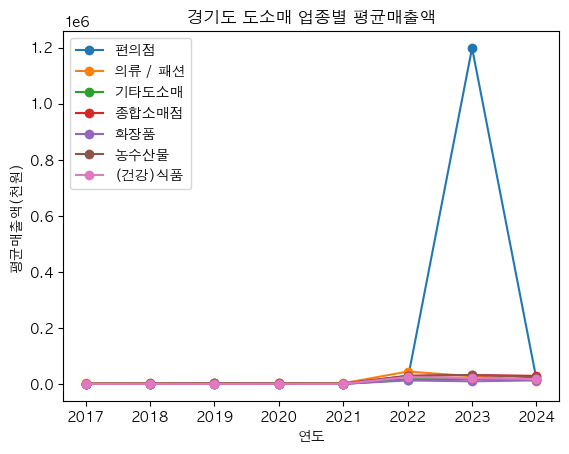

/var/folders/mv/xvtnn0v91cx8bl846n_qn4100000gn/T/ipykernel_18721/2362963323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr'] = df['yr'].astype(int)
/var/folders/mv/xvtnn0v91cx8bl846n_qn4100000gn/T/ipykernel_18721/2362963323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[value_col] = pd.to_numeric(df[value_col], errors='coerce')


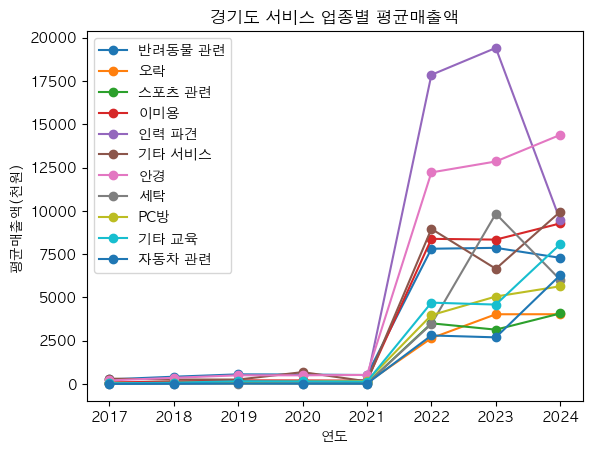

/var/folders/mv/xvtnn0v91cx8bl846n_qn4100000gn/T/ipykernel_18721/2362963323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr'] = df['yr'].astype(int)
/var/folders/mv/xvtnn0v91cx8bl846n_qn4100000gn/T/ipykernel_18721/2362963323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[value_col] = pd.to_numeric(df[value_col], errors='coerce')


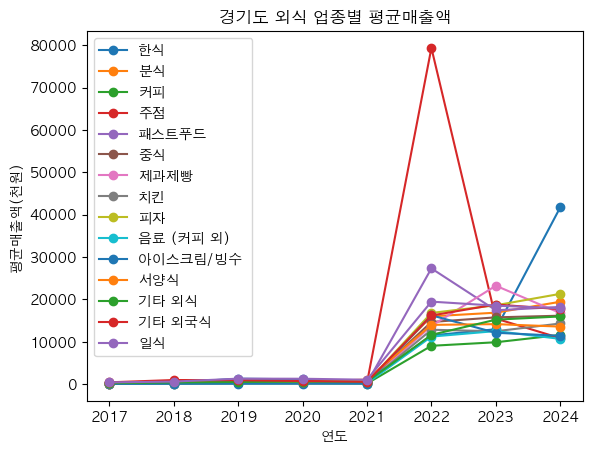

In [7]:
import matplotlib.pyplot as plt

def plot_avg_sales(df, title, value_col='arUnitAvrgSlsAmt'):
    df['yr'] = df['yr'].astype(int)
    df[value_col] = pd.to_numeric(df[value_col], errors='coerce')
    for induty in df['indutyMlsfcNm'].unique():
        sub = df[df['indutyMlsfcNm'] == induty]
        plt.plot(sub['yr'], sub[value_col], marker='o', label=induty)
    plt.title(title)
    plt.xlabel('연도')
    plt.ylabel('평균매출액(천원)')
    plt.legend()
    plt.show()

plot_avg_sales(retail_gg, '경기도 도소매 업종별 평균매출액')
plot_avg_sales(service_gg, '경기도 서비스 업종별 평균매출액')
plot_avg_sales(food_gg, '경기도 외식 업종별 평균매출액')

1-3. 유동인구 월별 집계 (포천시만)


In [33]:
import pandas as pd

# 유동인구 데이터 불러오기
floating = pd.read_csv('./데이터_전처리후/4_유동인구(202201-202505)/gyeonggido_population_concat_2024.csv')

# 포천시만 추출 (CTY_NM == '포천시')
floating_pc = floating[floating['CTY_NM'] == '포천시'].copy()

# 월별, 읍면동별 유동인구 총합 집계
cnt_cols = [col for col in floating_pc.columns if '_CNT' in col]
floating_pc['유동인구'] = floating_pc[cnt_cols].sum(axis=1)

floating_month = floating_pc.groupby(['ADMI_CD', 'YEAR', 'MONTH'])['유동인구'].sum().reset_index()
floating_month['연월'] = floating_month['YEAR'].astype(str) + '-' + floating_month['MONTH'].astype(str).str.zfill(2)

# 중요: ADMI_CD를 EMD_CD로 rename
floating_month = floating_month.rename(columns={'ADMI_CD': 'EMD_CD'})


In [35]:
# 최종 데이터 (유동인구만)
df_final = floating_month[['EMD_CD', '연월', '유동인구']].copy()
df_final = df_final.sort_values(['EMD_CD', '연월'])

# EMD_CD를 문자열로 변환
df_final['EMD_CD'] = df_final['EMD_CD'].astype(str)

# 읍면동명 추가 (행정동코드.csv에서)
code_df = pd.read_csv('./데이터_전처리후/7_행정동코드/행정동코드.csv', dtype=str)
df_final = df_final.merge(code_df[['ADMINIST_DONG_CD', 'EMD_NM']], 
                         left_on='EMD_CD', right_on='ADMINIST_DONG_CD', how='left')

print("최종 데이터:")
print(df_final.head())
print(f"총 {len(df_final)}개 행, {len(df_final['EMD_CD'].unique())}개 읍면동")

최종 데이터:
     EMD_CD       연월         유동인구 ADMINIST_DONG_CD EMD_NM
0  41650250  2024-01   8268825.48              NaN    NaN
1  41650250  2024-02   7942758.41              NaN    NaN
2  41650250  2024-03   8988694.74              NaN    NaN
3  41650250  2024-04   8295381.98              NaN    NaN
4  41650250  2024-05  10287283.06              NaN    NaN
총 140개 행, 14개 읍면동


In [48]:
# 유동인구 데이터에서 포천시 '동' 단위 확인
floating = pd.read_csv('./데이터_전처리후/4_유동인구(202201-202505)/gyeonggido_population_concat_2024.csv')
floating_pc = floating[floating['CTY_NM'] == '포천시'].copy()
print("포천시 유동인구 데이터의 읍면동명(ADMI_NM) 종류:")
print(sorted(floating_pc['ADMI_NM'].unique()))

포천시 유동인구 데이터의 읍면동명(ADMI_NM) 종류:
['가산면', '관인면', '군내면', '내촌면', '선단동', '소흘읍', '신북면', '영북면', '영중면', '이동면', '일동면', '창수면', '포천동', '화현면']


In [49]:
import geopandas as gpd
gdf = gpd.read_file('./LSMD_ADM_SECT_UMD_경기/LSMD_ADM_SECT_UMD_41_202506.shp', encoding='cp949')
pocheon_gdf = gdf[gdf['EMD_CD'].astype(str).str.startswith('41650')].copy()
print("포천시 경계 데이터의 읍면동명(EMD_NM) 종류:")
print(sorted(pocheon_gdf['EMD_NM'].unique()))

포천시 경계 데이터의 읍면동명(EMD_NM) 종류:
['가산면', '관인면', '군내면', '내촌면', '동교동', '선단동', '설운동', '소흘읍', '신북면', '신읍동', '어룡동', '영북면', '영중면', '이동면', '일동면', '자작동', '창수면', '화현면']


In [51]:
code_df = pd.read_csv('./데이터_전처리후/7_행정동코드/행정동코드.csv', dtype=str)
pocheon_codes = code_df[code_df['ADMINIST_DONG_CD'].str.startswith('41650')]
print("포천시 행정동코드.csv의 읍면동명(EMD_NM) 종류:")
print(sorted(pocheon_codes['EMD_NM'].unique()))

포천시 행정동코드.csv의 읍면동명(EMD_NM) 종류:


TypeError: '<' not supported between instances of 'str' and 'float'

1-4. 매출 데이터 (경기도 전체, 업종/연도별)

In [18]:
# 도소매 매출
sales_retail = pd.read_csv('./데이터_전처리후/5_매출현황/지역별_도소매별_평균매출액_현황.csv')
sales_retail_gg = sales_retail[sales_retail['areaNm'] == '경기'].copy()

# 서비스 매출
sales_service = pd.read_csv('./데이터_전처리후/5_매출현황/지역별_서비스별_평균매출액_현황.csv')
sales_service_gg = sales_service[sales_service['areaNm'] == '경기'].copy()

# 외식 매출
sales_food = pd.read_csv('./데이터_전처리후/5_매출현황/지역별_외식별_평균매출액_현황.csv')
sales_food_gg = sales_food[sales_food['areaNm'] == '경기'].copy()

1-4. 데이터 merge (시계열+공간 결합)


In [43]:
# STEP 1-3. 유동인구 월별 집계 (포천시만) - 이미 완료
import pandas as pd

# 유동인구 데이터 불러오기
floating = pd.read_csv('./데이터_전처리후/4_유동인구(202201-202505)/gyeonggido_population_concat_2024.csv')

# 포천시만 추출 (CTY_NM == '포천시')
floating_pc = floating[floating['CTY_NM'] == '포천시'].copy()

# 월별, 읍면동별 유동인구 총합 집계
cnt_cols = [col for col in floating_pc.columns if '_CNT' in col]
floating_pc['유동인구'] = floating_pc[cnt_cols].sum(axis=1)

floating_month = floating_pc.groupby(['ADMI_CD', 'YEAR', 'MONTH'])['유동인구'].sum().reset_index()
floating_month['연월'] = floating_month['YEAR'].astype(str) + '-' + floating_month['MONTH'].astype(str).str.zfill(2)

# 중요: ADMI_CD를 EMD_CD로 rename
floating_month = floating_month.rename(columns={'ADMI_CD': 'EMD_CD'})

# 최종 데이터 (유동인구만)
df_final = floating_month[['EMD_CD', '연월', '유동인구']].copy()
df_final = df_final.sort_values(['EMD_CD', '연월'])

# EMD_CD를 문자열로 변환
df_final['EMD_CD'] = df_final['EMD_CD'].astype(str)

# 읍면동명 추가 (행정동코드.csv에서)
code_df = pd.read_csv('./데이터_전처리후/7_행정동코드/행정동코드.csv', dtype=str)
df_final = df_final.merge(code_df[['ADMINIST_DONG_CD', 'EMD_NM']], 
                         left_on='EMD_CD', right_on='ADMINIST_DONG_CD', how='left')

print("STEP 1-3 완료 - 최종 데이터:")
print(df_final.head())
print(f"총 {len(df_final)}개 행, {len(df_final['EMD_CD'].unique())}개 읍면동")

# STEP 1-4. 데이터 merge (시계열+공간 결합) - 수정된 버전
import geopandas as gpd

# 1. 읍면동 경계 데이터 불러오기
gdf = gpd.read_file(
    './LSMD_ADM_SECT_UMD_경기/LSMD_ADM_SECT_UMD_41_202506.shp',
    encoding='cp949'
)

# 2. 포천시 읍면동만 추출
pocheon_gdf = gdf[gdf['EMD_CD'].astype(str).str.startswith('41650')].copy()

# 3. 중심좌표 계산
pocheon_gdf['lon'] = pocheon_gdf.centroid.x
pocheon_gdf['lat'] = pocheon_gdf.centroid.y

# 4. 공간정보 결합 (df_final과 pocheon_gdf merge)
df_spatial = df_final.merge(
    pocheon_gdf[['EMD_CD', 'geometry', 'lat', 'lon', 'EMD_NM']], 
    on='EMD_CD', how='left'
)

print("\nSTEP 1-4 완료 - 공간정보 결합 결과:")
print(df_spatial.head())
print(f"공간정보 결합 후: {len(df_spatial)}개 행")
print(f"geometry가 있는 행 수: {df_spatial['geometry'].notna().sum()}")

STEP 1-3 완료 - 최종 데이터:
     EMD_CD       연월         유동인구 ADMINIST_DONG_CD EMD_NM
0  41650250  2024-01   8268825.48              NaN    NaN
1  41650250  2024-02   7942758.41              NaN    NaN
2  41650250  2024-03   8988694.74              NaN    NaN
3  41650250  2024-04   8295381.98              NaN    NaN
4  41650250  2024-05  10287283.06              NaN    NaN
총 140개 행, 14개 읍면동

STEP 1-4 완료 - 공간정보 결합 결과:
     EMD_CD       연월         유동인구 ADMINIST_DONG_CD EMD_NM_x  \
0  41650250  2024-01   8268825.48              NaN      NaN   
1  41650250  2024-02   7942758.41              NaN      NaN   
2  41650250  2024-03   8988694.74              NaN      NaN   
3  41650250  2024-04   8295381.98              NaN      NaN   
4  41650250  2024-05  10287283.06              NaN      NaN   

                                            geometry            lat  \
0  POLYGON ((209319.773 575616.744, 209321.551 57...  577173.376847   
1  POLYGON ((209319.773 575616.744, 209321.551 57...  577173.376

In [44]:
# 현재 df_spatial의 컬럼 구조
print("현재 컬럼:", df_spatial.columns.tolist())
print("데이터 샘플:")
print(df_spatial[['EMD_CD', '연월', '유동인구', 'EMD_NM_y', 'lat', 'lon']].head())

현재 컬럼: ['EMD_CD', '연월', '유동인구', 'ADMINIST_DONG_CD', 'EMD_NM_x', 'geometry', 'lat', 'lon', 'EMD_NM_y']
데이터 샘플:
     EMD_CD       연월         유동인구 EMD_NM_y            lat            lon
0  41650250  2024-01   8268825.48      소흘읍  577173.376847  213130.981913
1  41650250  2024-02   7942758.41      소흘읍  577173.376847  213130.981913
2  41650250  2024-03   8988694.74      소흘읍  577173.376847  213130.981913
3  41650250  2024-04   8295381.98      소흘읍  577173.376847  213130.981913
4  41650250  2024-05  10287283.06      소흘읍  577173.376847  213130.981913


시계열 시각화

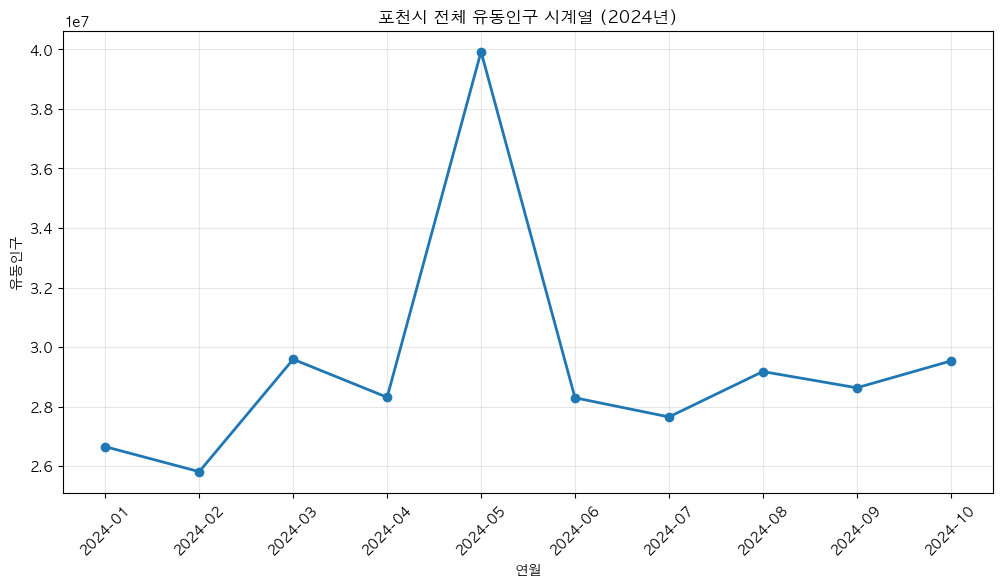

In [45]:
import matplotlib.pyplot as plt

# 전체 포천시 유동인구 시계열
plt.figure(figsize=(12, 6))
total_by_month = df_spatial.groupby('연월')['유동인구'].sum()
plt.plot(total_by_month.index, total_by_month.values, marker='o', linewidth=2)
plt.title('포천시 전체 유동인구 시계열 (2024년)')
plt.xlabel('연월')
plt.ylabel('유동인구')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# STEP 2. GNN/ConvLSTM 입력 데이터 생성

2-1. 공간(그래프) 정보 결합
앞서 만든 포천시 읍면동 인접 그래프(edges, 노드 리스트 등)와 결합

GNN/ConvLSTM 입력 데이터 생성

In [46]:
# (노드, 시간, feature) 형태로 변환
pivot_data = df_spatial.pivot_table(
    index='EMD_CD', 
    columns='연월', 
    values='유동인구', 
    fill_value=0
)

print("GNN/ConvLSTM 입력 데이터:")
print(f"노드 수: {pivot_data.shape[0]}개 읍면동")
print(f"시간 스텝: {pivot_data.shape[1]}개월")
print("데이터 형태:", pivot_data.shape)

GNN/ConvLSTM 입력 데이터:
노드 수: 14개 읍면동
시간 스텝: 10개월
데이터 형태: (14, 10)


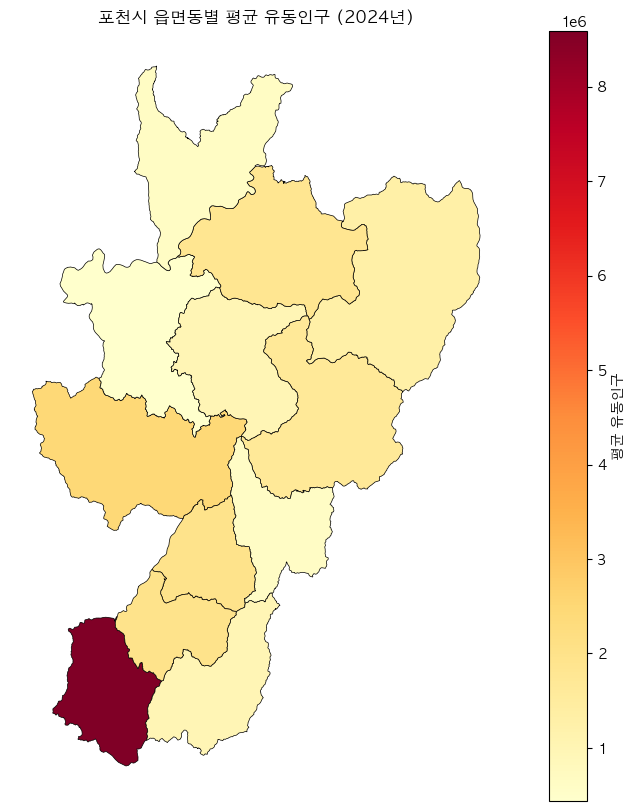

In [47]:
import geopandas as gpd

# 읍면동별 평균 유동인구
avg_by_emd = df_spatial.groupby('EMD_CD')['유동인구'].mean().reset_index()
avg_by_emd = avg_by_emd.merge(
    df_spatial[['EMD_CD', 'geometry', 'EMD_NM_y']].drop_duplicates(), 
    on='EMD_CD', how='left'
)

gdf_avg = gpd.GeoDataFrame(avg_by_emd, geometry='geometry')

fig, ax = plt.subplots(figsize=(12, 10))
gdf_avg.plot(column='유동인구', ax=ax, legend=True, 
             legend_kwds={'label': '평균 유동인구'},
             cmap='YlOrRd', edgecolor='black', linewidth=0.5)
ax.set_title('포천시 읍면동별 평균 유동인구 (2024년)')
ax.axis('off')
plt.show()

2-2. 시계열 feature 행렬 만들기

GNN/ST-GCN:

노드: 읍면동

feature: (월, 매출, 인구, 유동인구 등)

ConvLSTM:

(시간, 공간, feature) 3D 텐서

In [ ]:
# 예시: (노드, 시간, feature) 형태로 변환
pivot = df.pivot_table(index='EMD_CD', columns='연월', values=['매출액', '인구수', '유동인구'], fill_value=0)
# 또는 (시간, 노드, feature)로 변환

그래프 구조:
edges = [(노드1, 노드2), ...]
노드별 feature 행렬

# STEP 3. 미래 매출 예측/정책 추천 예시

3-1. 머신러닝/딥러닝 모델 입력 준비

X_train, y_train: 과거 feature → 미래 매출

GNN/ConvLSTM:

입력: (노드, 시간, feature), 그래프 edges

출력: 미래 매출 예측

3-2. 예측/정책 추천 로직 예시


In [ ]:
# 예시: 미래 1개월 매출 예측 (머신러닝)
from sklearn.ensemble import RandomForestRegressor

# X: 과거 n개월 feature, y: 다음달 매출
# (실제 데이터 shape에 맞게 슬라이싱)
X = ...  # (읍면동, n개월, feature)
y = ...  # (읍면동, 미래 매출)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 정책 추천 예시: 예측 매출이 높은 지역 추천
df_result = pd.DataFrame({'EMD_CD': test_emd_cd, '예측매출': y_pred})
추천 = df_result.sort_values('예측매출', ascending=False).head(5)
print('창업/정책 추천 지역:', 추천)